In [1]:
!pip install --upgrade hifi-gan-bwe

In [2]:
!pip install scipy

In [15]:
import audioread
import numpy as np
import torch
from IPython.display import Audio
from hifi_gan_bwe import BandwidthExtender
import os
import random

In [4]:
model = BandwidthExtender.from_pretrained("hifi-gan-bwe-10-42890e3-vctk-48kHz")

In [5]:
originalFilePath = "FullBandFiles/p232_001.wav"

In [10]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import decimate

fs, original_data = wav.read(originalFilePath)
original_data = original_data.astype(np.float32)/32767


In [456]:
import numpy as np
import IPython.display as ipd

# Define parameters
frequency = 17000.0  # Frequency of the sinusoidal wave (Hz)
sample_rate = 44100  # Sample rate (samples per second)
duration = 1.0  # Duration of the sound (seconds)

# Generate time values
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the sinusoidal wave
wave = 0.5 * np.sin(2 * np.pi * frequency * t)

# Play the sound
ipd.Audio(wave, rate=sample_rate, autoplay=True)


In [452]:
new_fs = 16000
q = int(fs/new_fs)

def downsample_data(data):
    downsampled_data = decimate(data, q, ftype='fir', zero_phase=True)
    new_downsampled_data = downsampled_data.reshape([-1, 1])

    return new_downsampled_data

downsampled_data = downsample_data(original_data)

In [12]:
def run_model(downsampled_data):
    with torch.no_grad():
        y = np.stack([model(torch.from_numpy(downsampled_data), new_fs) for downsampled_data in downsampled_data.T]).T
        y = y.reshape(-1)
    return y

y = run_model(downsampled_data)


In [23]:
folderpath = 'FullBandFiles'
folderlist = os.listdir(folderpath)
random.shuffle(folderlist)

In [ ]:
index = 66

In [489]:
index +=1

filepath_original = os.path.join(folderpath, folderlist[index])
#if filename[-4:].lower() != '.wav':
        
fs, original_data = wav.read(filepath_original)
print(index)

Audio(original_data.T, rate=fs, autoplay=True)

133


In [490]:
original_data = original_data.astype(np.float32)/32767

downsampled_data = downsample_data(original_data)

bwe_data = run_model(downsampled_data)

Audio(bwe_data.T, rate=int(model.sample_rate), autoplay=True)

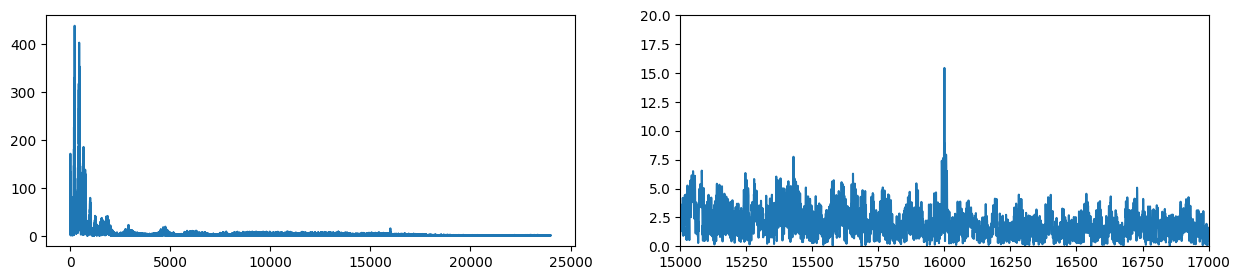

In [443]:
fs = 48000
period = 1/fs  
fft_length = 2**int(np.ceil(np.log2(len(bwe_data))))

bwe_fft = np.abs(np.fft.rfft(bwe_data, n = fft_length))
freq = np.fft.rfftfreq(fft_length, period)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))
ax1.plot(freq, bwe_fft)

ax2.plot(freq, bwe_fft)
ax2.set_ylim(0,20)
ax2.set_xlim(15000, 17000)
plt.show()